In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [9]:
hotels_full = pd.read_csv('/Users/irak/Documents/GIS/LA_hotels/LOS_ANGELES_COUNTY_APARTMENT_AND_HOTEL_INSPECTIONS.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [85]:
hotels = hotels_full.drop(['PROGRAM ELEMENT', 'SERVICE CODE', 'SERIAL NUMBER', 'APN', 'STATE', 'RECORD ID'], axis=1)
hotels.head()

,ACTIVITY DATE,FACILITY ID,FACILITY NAME,PROGRAM IDENTIFIER,STATUS,PE DESCRIPTION,ADDRESS,CITY,ZIP,GIS LATITUDE,GIS LONGITUDE,SERVICE DESCRIPTION
0,06/01/2018,FA0172540,ORANGEBROOK MANOR,ORANGEBROOK MANOR,ACTIVE,MULTIPLE FAMILY DWELLING (101 + ) UNITS,5400 YARMOUTH AVE,ENCINO,91316,34.169040,-118.520140,COMPLAINT INVESTIGATION
1,06/01/2018,FA0254068,1714 N GARFIELD PL APTS,1714 N GARFIELD PL APTS,INACTIVE,MULTIPLE FAMILY DWELLING (11-20) UNITS,1714 N GARFIELD PL,LOS ANGELES,90028,34.102270,-118.310540,COMPLAINT INVESTIGATION
2,06/01/2018,FA0173466,1819 S GRAMERCY PL APTS,1819 S GRAMERCY PL APTS,ACTIVE,MULTIPLE FAMILY DWELLING (11-20) UNITS,1819 S GRAMERCY PL #303,LOS ANGELES,90019,34.041070,-118.313220,COMPLAINT INVESTIGATION
3,06/01/2018,FA0107297,11692 CHENAULT ST APTS,11692 CHENAULT ST APTS,INACTIVE,MULTIPLE FAMILY DWELLING (21-50) UNITS,11692 CHENAULT ST,LOS ANGELES,90049,34.056425,-118.467263,COMPLAINT INVESTIGATION
4,06/01/2018,FA0177960,1501 W ADAMS BLVD APTS,1501 W ADAMS BLVD APTS,ACTIVE,MULTIPLE FAMILY DWELLING (21-50) UNITS,1501 W ADAMS BLVD,LOS ANGELES,90007,34.032910,-118.294450,COMPLAINT INVESTIGATION


In [86]:
hotels['units_rooms'] = hotels['PE DESCRIPTION'].str.partition("(")[2]
hotels['units_rooms'] = hotels['units_rooms'].str.replace(')', '')

In [87]:
hotels['type'] = hotels['PE DESCRIPTION'].str.partition("(")[0]
hotels['type'] = hotels['type'].apply(lambda x: x.rstrip())

In [88]:
hotels['num_units'] = hotels['units_rooms'].str.partition(" ")[0]
hotels['num_units'] = hotels['num_units'].str.replace('101', '101+')
hotels['num_units'] = hotels['num_units'].str.replace('6-10', '5-10')

In [89]:
hotels_unique = hotels.groupby('FACILITY ID').first()
hotels_unique.head()

,ACTIVITY DATE,FACILITY NAME,PROGRAM IDENTIFIER,STATUS,PE DESCRIPTION,ADDRESS,CITY,ZIP,GIS LATITUDE,GIS LONGITUDE,SERVICE DESCRIPTION,units_rooms,type,num_units
FACILITY ID,,,,,,,,,,,,,,
FA0008357,06/06/2019,OXFORD HOTEL,CHANG DOWON,ACTIVE,HOTEL (51-100) ROOMS,745 S OXFORD AVE STE 201,LOS ANGELES,90005,34.058423,-118.308001,ROUTINE INSPECTION,51-100 ROOMS,HOTEL,51-100
FA0010226,02/05/2019,CRESCENT HOTEL,THE CRESCENT HOTEL,ACTIVE,HOTEL (21-50) ROOMS,403 N CRESCENT DR,BEVERLY HILLS,90210,34.071233,-118.400284,ROUTINE INSPECTION,21-50 ROOMS,HOTEL,21-50
FA0010357,07/11/2018,CULVER HOTEL,CULVER HOTEL,ACTIVE,HOTEL (21-50) ROOMS,9400 CULVER BLVD,CULVER CITY,90232,34.023862,-118.394158,ROUTINE INSPECTION,21-50 ROOMS,HOTEL,21-50
FA0012421,11/20/2018,CAMINO MOTEL,CAMINO MOTEL #2,ACTIVE,HOTEL (51-100) ROOMS,15601 CRENSHAW BLVD,GARDENA,90249,33.888877,-118.326765,ROUTINE INSPECTION,51-100 ROOMS,HOTEL,51-100
FA0014420,12/27/2018,FRIENDLY HILLS INN,FRIENDLY HILLS INN,ACTIVE,HOTEL (21-50) ROOMS,14329 WHITTIER BLVD,WHITTIER,90605,33.955642,-118.018454,ROUTINE INSPECTION,21-50 ROOMS,HOTEL,21-50


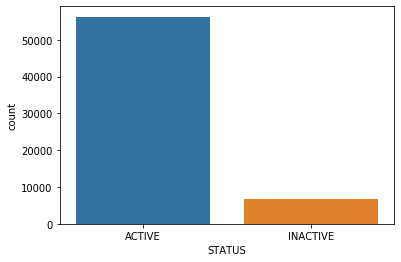

In [82]:
sns.countplot(data=hotels_unique, x='STATUS');

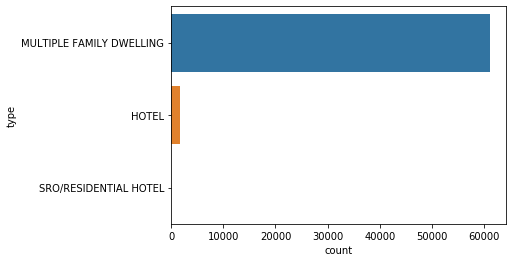

In [83]:
sns.countplot(data=hotels_unique, y='type', orient='h', order=hotels_unique['type'].value_counts().index);

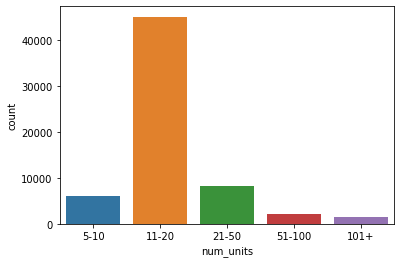

In [84]:
sns.countplot(data=hotels_unique, order=['5-10','11-20','21-50','51-100','101+'], x='num_units');

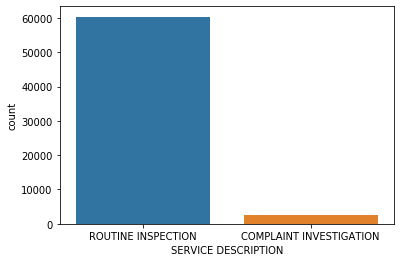

In [90]:
sns.countplot(data=hotels_unique, x='SERVICE DESCRIPTION')

In [92]:
geodf_hotels = gpd.GeoDataFrame(hotels_unique, geometry=gpd.points_from_xy(hotels_unique['GIS LONGITUDE'], hotels_unique['GIS LATITUDE']), crs="EPSG:4326") # объявляем геометрию
geodf_hotels = geodf_hotels.to_crs(epsg=32611) # меняем crs на нужную

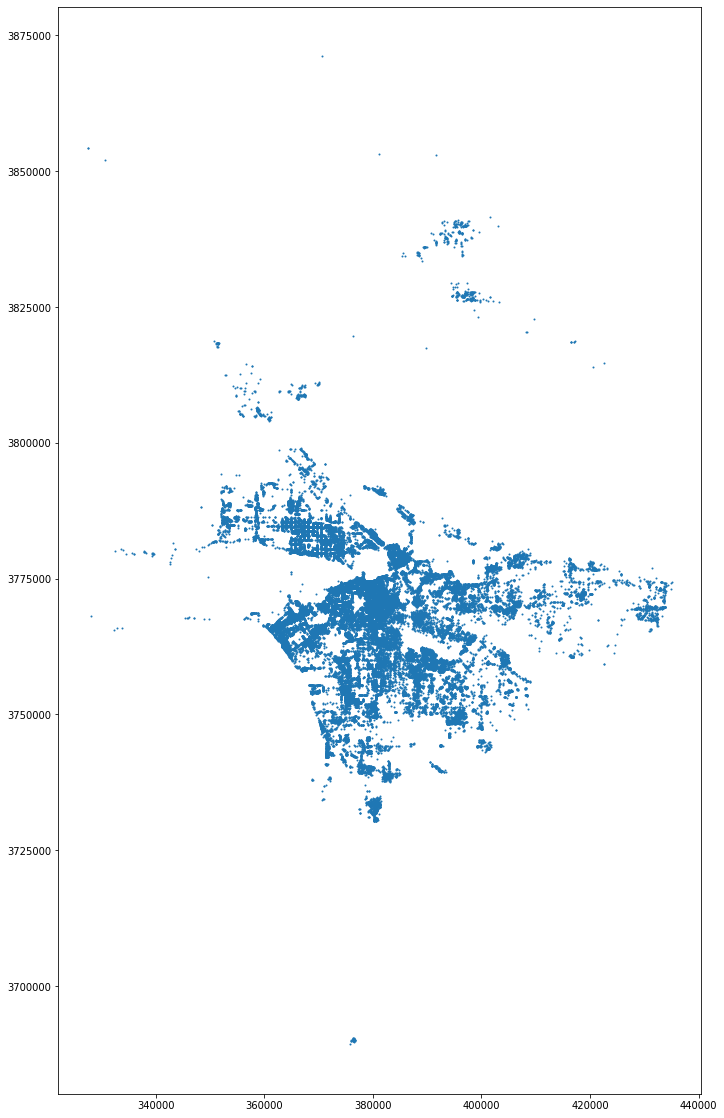

In [94]:
geodf_hotels.plot(figsize=(20, 20), markersize=1)

In [102]:
neigh = gpd.read_file('/Users/irak/Documents/LA_proj/la-county-neighborhoods-current/')

In [103]:
neigh_proj = neigh.to_crs(epsg=32611)

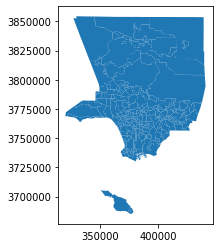

In [98]:
neigh_proj.plot()

In [104]:
neigh_proj['city_low'] = neigh_proj['name'].str.lower()
hotels_unique['city_low'] = hotels_unique['CITY'].str.lower()

In [125]:
hotels_unique['city_low'].value_counts()

los angeles               25563
glendale                   2764
santa monica               2384
north hollywood            2109
van nuys                   1827
                          ...  
valyermo                      1
bel air                       1
las vegas nvidia 89162        1
kagel canyon                  1
acton                         1
Name: city_low, Length: 138, dtype: int64

In [127]:
hotels_by_city.values

array([25563,  2764,  2384,  2109,  1827,  1553,  1173,  1052,   967,
         865,   838,   738,   715,   688,   685,   664,   651,   625,
         619,   617,   550,   504,   502,   494,   438,   425,   417,
         393,   393,   385,   372,   367,   367,   349,   338,   325,
         323,   322,   318,   306,   305,   299,   285,   265,   258,
         237,   218,   217,   212,   209,   207,   198,   198,   193,
         180,   173,   173,   171,   167,   154,   141,   134,   132,
         132,   128,   123,   120,   118,   115,   109,   108,   103,
          94,    92,    92,    91,    90,    90,    89,    89,    88,
          81,    80,    76,    75,    70,    67,    63,    58,    55,
          51,    49,    48,    44,    38,    36,    36,    36,    36,
          30,    28,    22,    20,    19,    18,    18,    16,    16,
          12,    12,    11,    11,     9,     8,     8,     7,     6,
           6,     4,     3,     3,     3,     3,     2,     2,     2,
           1,     1,

In [158]:
ndf = hotels_unique['city_low'].value_counts()
hotels_by_city = pd.DataFrame(columns=['city_low', 'hotels_count'])
hotels_by_city['city_low'] = ndf.index
hotels_by_city['hotels_count'] = ndf.values
hotels_by_city.head()

,city_low,hotels_count
0,los angeles,25563
1,glendale,2764
2,santa monica,2384
3,north hollywood,2109
4,van nuys,1827


In [133]:
hotels_by_city['city_low'].isin(neigh_proj['city_low']).value_counts()

True     123
False     15
Name: city_low, dtype: int64

In [159]:
neigh_proj['city_low'].isin(hotels_by_city['city_low']).value_counts()

False    149
True     123
Name: city_low, dtype: int64

In [134]:
neigh_hotels = neigh_proj.merge(hotels_by_city, on='city_low', how='left')

In [150]:
neigh_hotels = neigh_hotels.drop(['name_1', 'slug_1'], axis=1)

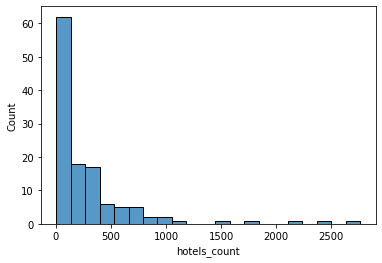

In [143]:
sns.histplot(data=neigh_hotels, x='hotels_count');

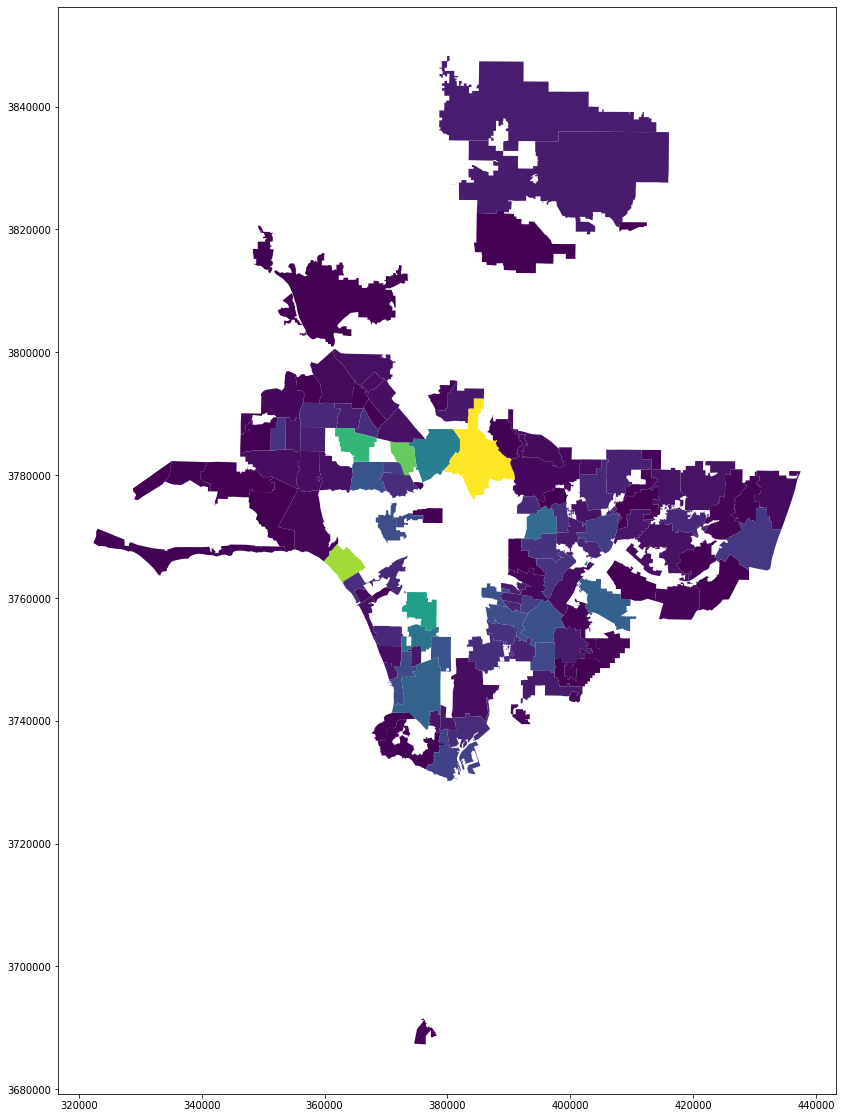

In [151]:
neigh_hotels.dropna().plot(column='hotels_count', figsize=(20, 20));

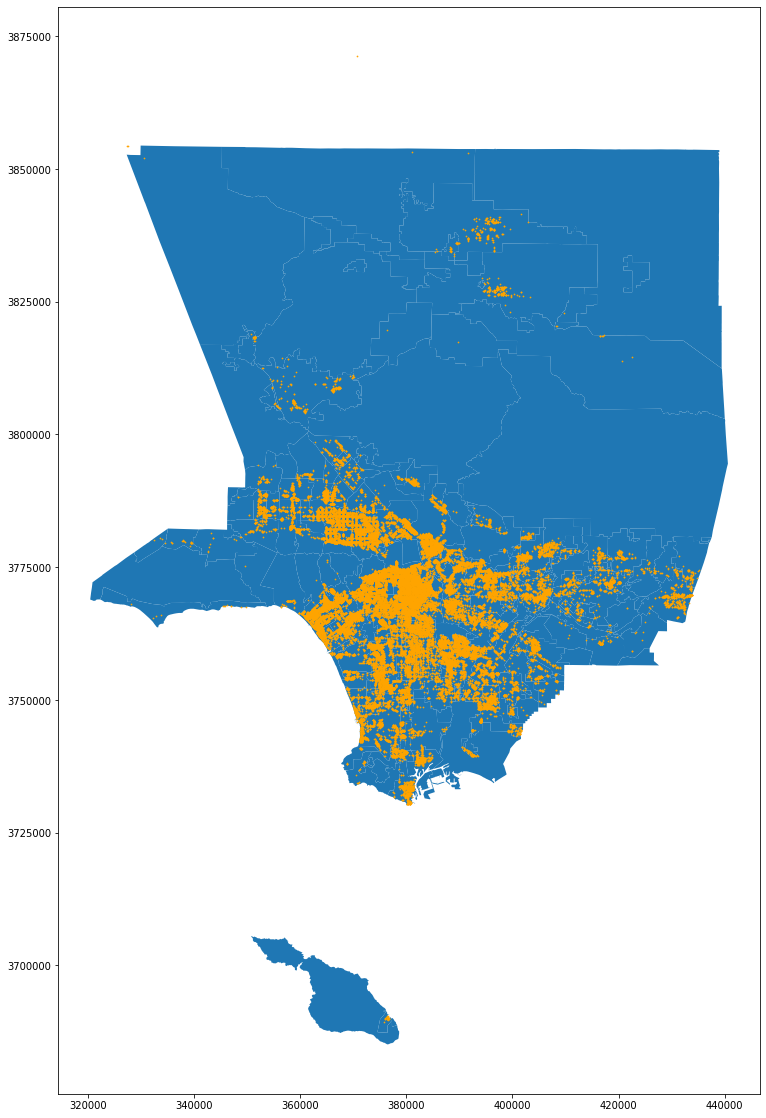

In [179]:
ax = neigh_proj.plot(figsize=(20, 20))
geodf_hotels.plot(ax=ax, color='orange', markersize=0.5)

In [184]:
geodf_hotels.geometry.within(neigh_proj.geometry.values[1]).value_counts()

False    62698
True       194
dtype: int64

In [192]:
# pip_bool = geodf_hotels.geometry.within(neigh_proj.geometry.values[1])
# neigh_hotels_pip = geodf_hotels.loc[pip_bool]
gpd.sjoin(geodf_hotels, neigh_proj, how="inner", op='within')
# pointsInPolygon['const']=1
# pointsInPolygon = pointsInPolygon.groupby('statename').agg({'columnA':'first', 'columnB':'first', 'const':'sum'}).reset_index()

AttributeError: 'NoneType' object has no attribute 'intersection'

In [188]:
neigh_hotels_pip

,ACTIVITY DATE,FACILITY NAME,PROGRAM IDENTIFIER,STATUS,PE DESCRIPTION,ADDRESS,CITY,ZIP,GIS LATITUDE,GIS LONGITUDE,SERVICE DESCRIPTION,units_rooms,type,num_units,geometry
FACILITY ID,,,,,,,,,,,,,,,
FA0074832,04/17/2019,1550-70 W. 27TH ST,1550-70 W. 27TH ST,ACTIVE,MULTIPLE FAMILY DWELLING (11-20) UNITS,2700 S VAN BUREN PL,LOS ANGELES,90018,34.030735,-118.296837,ROUTINE INSPECTION,11-20 UNITS,MULTIPLE FAMILY DWELLING,11-20,POINT (380279.216 3766322.191)
FA0075136,08/31/2018,1573 W 029TH ST APTS,1573 W 029TH ST APTS,ACTIVE,MULTIPLE FAMILY DWELLING (11-20) UNITS,1573 W 29TH ST,LOS ANGELES,90007,34.029238,-118.296655,ROUTINE INSPECTION,11-20 UNITS,MULTIPLE FAMILY DWELLING,11-20,POINT (380293.934 3766155.880)
FA0075770,05/31/2019,2720 S RAYMOND APTS,2720 S RAYMOND APTS,INACTIVE,MULTIPLE FAMILY DWELLING (11-20) UNITS,2720 S RAYMOND AVE,LOS ANGELES,90007,34.030307,-118.297921,ROUTINE INSPECTION,11-20 UNITS,MULTIPLE FAMILY DWELLING,11-20,POINT (380178.575 3766275.967)
FA0076170,02/06/2019,2923 S NORMANDIE AVE APTS,2923 S NORMANDIE AVE APTS,ACTIVE,MULTIPLE FAMILY DWELLING (11-20) UNITS,2923 S NORMANDIE AVE,LOS ANGELES,90007,34.028701,-118.300397,ROUTINE INSPECTION,11-20 UNITS,MULTIPLE FAMILY DWELLING,11-20,POINT (379947.709 3766100.737)
FA0076497,01/22/2019,2717 S BUDLONG AVE APTS,2717 S BUDLONG AVE APTS,ACTIVE,MULTIPLE FAMILY DWELLING (11-20) UNITS,2717 S BUDLONG AVE,LOS ANGELES,90007,34.030351,-118.296073,ROUTINE INSPECTION,11-20 UNITS,MULTIPLE FAMILY DWELLING,11-20,POINT (380349.205 3766278.670)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA0270202,10/03/2019,2640 S DALTON AVE APTS,2640 S DALTON AVE APTS,ACTIVE,MULTIPLE FAMILY DWELLING (11-20) UNITS,2640 S DALTON AVE,LOS ANGELES,90018,34.031390,-118.303900,ROUTINE INSPECTION,11-20 UNITS,MULTIPLE FAMILY DWELLING,11-20,POINT (379628.057 3766403.060)
FA0270705,01/09/2020,2923 S BRIGHTON AVE APTS,2923 S BRIGHTON AVE APTS,INACTIVE,MULTIPLE FAMILY DWELLING (11-20) UNITS,2923 S BRIGHTON AVE,LOS ANGELES,90018,34.028450,-118.301630,ROUTINE INSPECTION,11-20 UNITS,MULTIPLE FAMILY DWELLING,11-20,POINT (379833.484 3766074.378)
FA0271459,03/10/2020,2922 S BUDLONG AVE APTS,2922 S BUDLONG AVE APTS,ACTIVE,MULTIPLE FAMILY DWELLING (5-10) UNITS,2922 S BUDLONG AVE,LOS ANGELES,90007,34.028030,-118.295760,ROUTINE INSPECTION,5-10 UNITS,MULTIPLE FAMILY DWELLING,5-10,POINT (380374.848 3766020.929)


In [ ]:
pip.plot(column='')